## scikit-learn中的多项式回归和Pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(777)

x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)  # 参数代表要添加的特征是几次幂
poly.fit(X)
X2 = poly.transform(X)

In [4]:
X2.shape

(100, 3)

In [5]:
X2[:5, :]

array([[ 1.        , -2.08401759,  4.34312932],
       [ 1.        , -1.18586034,  1.40626475],
       [ 1.        , -2.62778151,  6.90523567],
       [ 1.        , -0.24083795,  0.05800292],
       [ 1.        ,  2.01152031,  4.04621394]])

In [6]:
# 这个转换后的 X2 中每一行代表的是 X 的 0、1、2 次幂的值

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

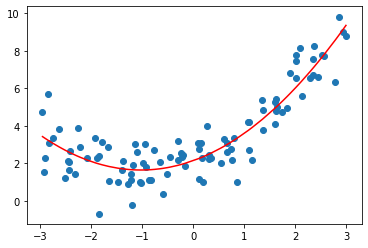

In [8]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [9]:
lin_reg2.coef_

array([0.        , 0.97572812, 0.47689109])

In [11]:
lin_reg2.intercept_

2.1402707732269493

### 关于 PolynomialFeatures 

In [13]:
# 看看多元变量的情况
X = np.arange(1, 11).reshape(-1, 2)

print(X.shape)
X

(5, 2)


array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [16]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

print(X2.shape)
X2

(5, 6)


array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

In [17]:
# 第一列是0次幂
# 第二列，第三列就是之前的 X 矩阵，是 1 次幂
# 第四列，第五列，第六列 对应的是 X1*X1, X1*X2, X2*X2, 是 2 次幂

## Pipeline

In [31]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [53]:
# 可以把对数据的操作按照管道的方式进行，包括 多项式、数据归一化、线性回归
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [54]:
pipeline_reg.fit(X, y)
y_predict = pipeline_reg.predict(X)

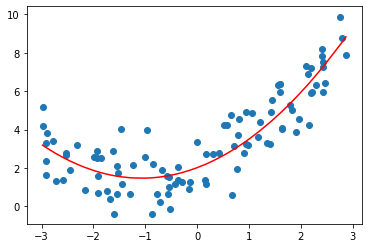

In [60]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

In [61]:
# 代码简洁多了。